In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import train_test_split as tts

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

In [21]:
nl=[];
cl=[];
for i in df.columns:
    if df[i].nunique() <= 10:
        cl.append(i)
    else:
        nl.append(i);

print ("categorival column :",cl)
print ("numercal column : ",nl)

categorival column : ['Outcome']
numercal column :  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [27]:
df[nl]=scal.fit_transform(df[nl])

In [28]:
X=df[nl]

In [29]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [30]:
Y=df[cl]

In [31]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [32]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.2,random_state=20)

In [34]:
# linear model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(xtrain,ytrain)

C:\Users\dell\anaconda31\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [40]:
pred1=lr.predict(xtest)
ac1=ac(ytest,pred1)
print (ac1)

0.7532467532467533


In [41]:
from sklearn import svm

In [42]:
svm=svm.SVC()

In [43]:
svm.fit(xtrain,ytrain)

C:\Users\dell\anaconda31\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [44]:
pred2=svm.predict(xtest)
ac2=ac(ytest,pred2)
print (ac2)

0.7597402597402597


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)

C:\Users\dell\anaconda31\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [54]:
pred3=knc.predict(xtest)
ac3=ac(ytest,pred3)
print (ac3)

0.7662337662337663


In [56]:
result1=pd.DataFrame({'Model':['LR','SVM','KNC'],
                     'accuracy':[ac1,ac2,ac3]})

In [57]:
result1

,Model,accuracy
0,LR,0.753247
1,SVM,0.759740
2,KNC,0.766234


C:\Users\dell\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='accuracy'>

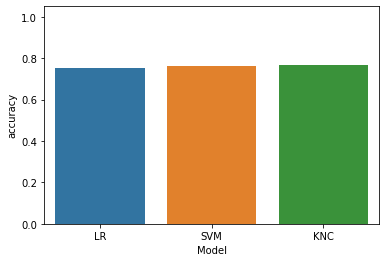

In [64]:
mpl.plot(1,1)
sb.barplot(result1['Model'],result1['accuracy'])
